In [1]:
# 1.导入库和模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [2]:
# 2.导入数据并探索数据
data = load_breast_cancer()
X = data.data
y = data.target
data.data.shape

(569, 30)

In [3]:
# 3.L1和L2正则化差别
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)
print(lrl1.coef_)
print((lrl1.coef_ != 0).sum(axis=1))
print()

lrl2 = lrl2.fit(X,y)
print(lrl2.coef_)
print((lrl2.coef_ != 0).sum(axis=1))

[[ 4.00510247  0.03199019 -0.13776699 -0.01622765  0.          0.
   0.          0.          0.          0.          0.          0.50459313
   0.         -0.07126548  0.          0.          0.          0.
   0.          0.          0.         -0.24584456 -0.12864657 -0.01440315
   0.          0.         -2.03549842  0.          0.          0.        ]]
[10]

[[ 1.61543234e+00  1.02284415e-01  4.78483684e-02 -4.43927107e-03
  -9.42247882e-02 -3.01420673e-01 -4.56065677e-01 -2.22346063e-01
  -1.35660484e-01 -1.93917198e-02  1.61646580e-02  8.84531037e-01
   1.20301273e-01 -9.47422278e-02 -9.81687769e-03 -2.37399092e-02
  -5.71846204e-02 -2.70190106e-02 -2.77563737e-02  1.98122260e-04
   1.26394730e+00 -3.01762592e-01 -1.72784162e-01 -2.21786411e-02
  -1.73339657e-01 -8.79070550e-01 -1.16325561e+00 -4.27661014e-01
  -4.20612369e-01 -8.69820058e-02]]
[30]


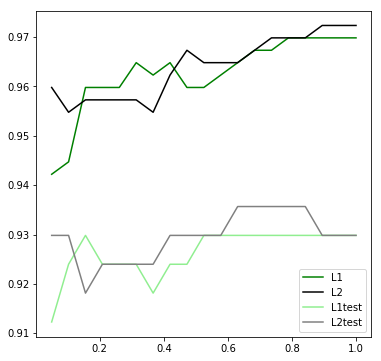

In [4]:
# 4.绘制L1,L2在训练集和测试集上的学习曲线
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19): #在0.05到1之间取19个数
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()